<a href="https://colab.research.google.com/github/Jitmandal051004/iris-prediction_nn/blob/main/iris_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [6]:
class Model(nn.Module):
    def __init__(self, in_feature=4, h1=8, h2=9, out_feature=3):
        super(Model, self).__init__()
        self.fc1 = nn.Linear(in_feature, h1)
        self.fc2 = nn.Linear(h1, h2)
        self.out = nn.Linear(h2, out_feature)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.out(x)

        return x

In [7]:
torch.manual_seed(41)
model = Model()

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [9]:
url = 'https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv'
my_df = pd.read_csv(url)

In [10]:
my_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [11]:
my_df["species"] = my_df["species"].map({'setosa':0.0, 'versicolor':1.0, 'virginica':2.0})

In [12]:
my_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [16]:
X = my_df.drop("species", axis=1).values #drop and .values convert to numpy array
y = my_df["species"].values

In [23]:
from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

In [19]:
X_train

array([[5.7, 2.6, 3.5, 1. ],
       [6.5, 2.8, 4.6, 1.5],
       [4.9, 2.5, 4.5, 1.7],
       [5.5, 2.6, 4.4, 1.2],
       [6.7, 3. , 5.2, 2.3],
       [5.8, 4. , 1.2, 0.2],
       [6.9, 3.1, 5.1, 2.3],
       [6.4, 3.2, 4.5, 1.5],
       [6.9, 3.1, 5.4, 2.1],
       [5.9, 3.2, 4.8, 1.8],
       [6.2, 2.9, 4.3, 1.3],
       [5.7, 2.8, 4.5, 1.3],
       [5.2, 4.1, 1.5, 0.1],
       [6.5, 3. , 5.8, 2.2],
       [6.3, 3.4, 5.6, 2.4],
       [5.7, 3.8, 1.7, 0.3],
       [6.7, 2.5, 5.8, 1.8],
       [5.1, 2.5, 3. , 1.1],
       [4.8, 3. , 1.4, 0.3],
       [6.2, 2.2, 4.5, 1.5],
       [6.4, 2.7, 5.3, 1.9],
       [5.8, 2.7, 3.9, 1.2],
       [7.4, 2.8, 6.1, 1.9],
       [5.2, 3.5, 1.5, 0.2],
       [5.5, 4.2, 1.4, 0.2],
       [5.9, 3. , 5.1, 1.8],
       [6.2, 2.8, 4.8, 1.8],
       [4.6, 3.1, 1.5, 0.2],
       [5.6, 3. , 4.5, 1.5],
       [4.6, 3.4, 1.4, 0.3],
       [4.9, 3.1, 1.5, 0.1],
       [6.6, 3. , 4.4, 1.4],
       [5.4, 3.9, 1.3, 0.4],
       [4.9, 2.4, 3.3, 1. ],
       [6.2, 3

In [28]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [24]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [31]:
epochs = 1000
losses = []

In [32]:
for i in range(epochs):
  y_pred = model.forward(X_train)
  loss = criterion(y_pred, y_train)
  losses.append(loss.detach().numpy())

  if i%10 == 0:
    print(f'Epoch: {i} and loss: {loss}')

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

Epoch: 0 and loss: 0.05286576226353645
Epoch: 10 and loss: 0.04508381709456444
Epoch: 20 and loss: 0.03979949280619621
Epoch: 30 and loss: 0.035970740020275116
Epoch: 40 and loss: 0.03293721750378609
Epoch: 50 and loss: 0.03041938506066799
Epoch: 60 and loss: 0.026795217767357826
Epoch: 70 and loss: 0.02338254824280739
Epoch: 80 and loss: 0.020531881600618362
Epoch: 90 and loss: 0.018495969474315643
Epoch: 100 and loss: 0.016802635043859482
Epoch: 110 and loss: 0.015519778244197369
Epoch: 120 and loss: 0.014496986754238605
Epoch: 130 and loss: 0.013443661853671074
Epoch: 140 and loss: 0.012677091173827648
Epoch: 150 and loss: 0.011877342127263546
Epoch: 160 and loss: 0.01128967385739088
Epoch: 170 and loss: 0.010908301919698715
Epoch: 180 and loss: 0.010098334401845932
Epoch: 190 and loss: 0.009513933211565018
Epoch: 200 and loss: 0.00903741829097271
Epoch: 210 and loss: 0.008615588769316673
Epoch: 220 and loss: 0.008653796277940273
Epoch: 230 and loss: 0.007937375456094742
Epoch: 240 

Text(0.5, 0, 'Epochs')

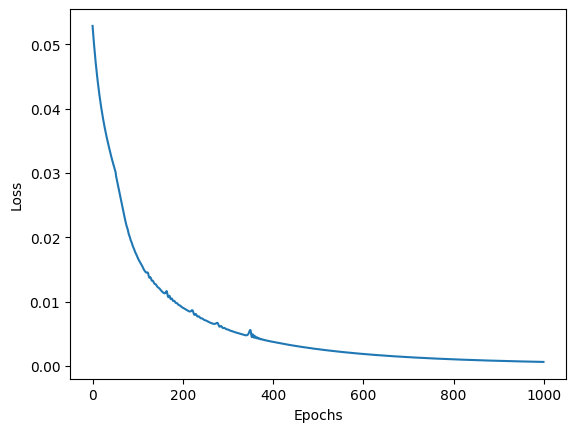

In [33]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('Epochs')